# objectives
*groupby() Department → average MonthlyIncome

*groupby() Gender → % working OverTime

*groupby() EducationField → average YearsAtCompany

*crosstab() on OverTime vs Attrition

In [1]:
import pandas as pd


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dasarpai/DAI-Datasets/main/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [78]:
#groupby() Department → average MonthlyIncome
group= data.groupby('Department')['MonthlyIncome'].mean(numeric_only=True).reset_index(name='Mean')
print(group)
print('the department with maximum mean is : ', group.max())

               Department         Mean
0         Human Resources  6654.507937
1  Research & Development  6281.252862
2                   Sales  6959.172646
the department with maximum mean is :  Department          Sales
Mean          6959.172646
dtype: object


the column'monthlyincome' in which we are going to apply mean fumction or any other function is under [] brackests, and the column 'Department' in whose basis the grouping is done is under () brackets.

In [58]:
#groupby() Gender → % working OverTime
group1= data.groupby('Gender')['OverTime'].size().reset_index(name='Count')
group1


,Gender,Count
0,Female,588
1,Male,882


In [57]:
group1['percentage']= group1['Count']/ group1.groupby('Gender')['Count'].transform('sum')*100
group1

,Gender,Count,percentage
0,Female,588,100.0
1,Male,882,100.0


for percentage we are first takig the total count of female and males in organization who are doinng overtime on the basis of gender, then we dividig this count with the total no. of females or males present in organization.

In [64]:
#groupby() EducationField → average YearsAtCompany
group2= data.groupby('EducationField')['YearsAtCompany'].mean().round(0).astype(int)
group2

EducationField
Human Resources     7
Life Sciences       7
Marketing           8
Medical             7
Other               6
Technical Degree    7
Name: YearsAtCompany, dtype: int64

In [76]:
#crosstab() on OverTime vs Attrition
crosstab_1= pd.crosstab(index=data['Attrition'], columns= data['OverTime'], margins=True, margins_name= 'total')
crosstab_1

OverTime,No,Yes,total
Attrition,,,
No,944,289,1233
Yes,110,127,237
total,1054,416,1470


In [86]:
pivot= pd.pivot_table(data, 
                     values='YearsAtCompany',
                     index='EducationField',
                     columns='Attrition',
                     aggfunc='mean')
pivot

Attrition,No,Yes
EducationField,,
Human Resources,8.400000,2.142857
Life Sciences,7.315280,5.123596
Marketing,8.064516,5.771429
Medical,7.413965,5.142857
Other,6.549296,4.272727
Technical Degree,6.980000,5.375000


<Axes: title={'center': 'Plotting using Pandas'}, ylabel='Department'>

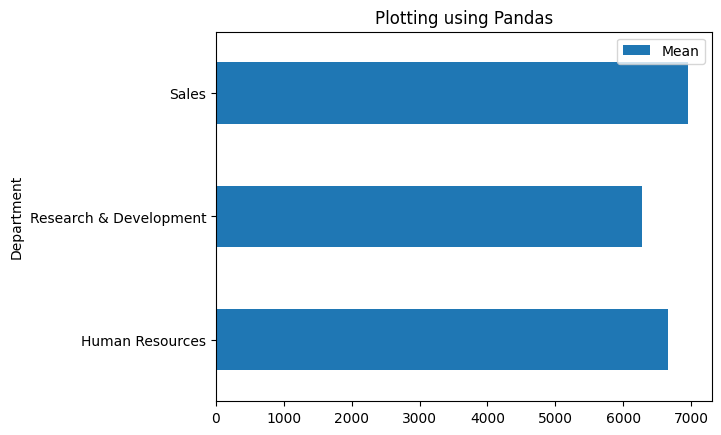

In [82]:
group.plot('Department', 'Mean', kind= 'barh', title= 'Plotting using Pandas')
